In [1]:
import os
import glob

import pandas as pd
import matplotlib.pyplot as plt
from aicsimageio import AICSImage
import skimage.measure as measure

import image_utils
import line_utils

In [2]:
base_path = "/Users/zachcm/Documents/Projects/ExM_Nadja/01_Macros_Analysis/"
workbook = "20241008_septin2_tubulin.xlsx"
workbook_path = os.path.join(base_path, workbook)
toc = pd.read_excel(workbook_path, sheet_name="ToC + P-t-p", header=2)
toc = toc[~toc['Stage'].isna()]

In [3]:
dx, dy, dz = 0.09, 0.09, 1.0   # um

In [4]:
ml = toc.iloc[0]
ml

Stage                                                            RS
Label             20240719_NRK49FS2GFP_UExM_GFP-488_aTub-568_DAP...
Area                                                        12960.0
Mean                                                         206.99
X                                                             651.0
Y                                                            1033.0
Angle                                                      -112.212
Channel                                                         2.0
length                                                      518.475
X1                                                            224.0
X2                                                            307.0
dX (pxl)                                                       83.0
dX (µm)                                                    1.682432
EF                                                             4.44
Unnamed: 14                                     

In [5]:
image_directory = "/Volumes/Ries_Ewers/Septin2-GFP"

file_stub = os.path.splitext(ml["Label"])[0]

image_files = glob.glob(image_directory+"/*.nd")
for image_file in image_files:
    if file_stub in image_file:
        break
# image_file = "20240719_NRK49FS2GFP_UExM_GFP-488_aTub-568_DAPI_25min_01.nd"
image_path = os.path.join(image_directory, image_file)

In [18]:
im = AICSImage(image_path)

In [11]:
mean0 = im.data.mean(2).squeeze()

In [19]:
mean_proj_xy = im.data.mean(2).squeeze()
max_proj_xy = im.data.max(2).squeeze()
mean_proj_xz = im.data.mean(3).squeeze()
max_proj_xz = im.data.max(3).squeeze()

In [22]:
mean_proj_xy = im[:].mean(1).squeeze()
max_proj_xy = im[:].max(1).squeeze()
mean_proj_xz = im[:].mean(2).squeeze()
max_proj_xz = im[:].max(2).squeeze()

In [21]:
im = image_utils.NDImage(image_path)

In [13]:
im[:].mean(1).squeeze()

array([[[128.46153846, 129.19230769, 128.30769231, ..., 127.57692308,
         124.34615385, 125.76923077],
        [126.30769231, 126.26923077, 130.5       , ..., 123.5       ,
         121.23076923, 123.        ],
        [133.07692308, 126.26923077, 128.11538462, ..., 125.23076923,
         121.19230769, 121.69230769],
        ...,
        [134.65384615, 133.34615385, 129.96153846, ..., 125.15384615,
         122.65384615, 120.46153846],
        [128.73076923, 135.76923077, 128.96153846, ..., 125.80769231,
         126.19230769, 123.46153846],
        [133.73076923, 129.84615385, 126.5       , ..., 121.65384615,
         126.65384615, 123.30769231]],

       [[105.11538462, 105.80769231, 104.65384615, ..., 106.46153846,
         106.26923077, 106.57692308],
        [103.84615385, 104.34615385, 107.57692308, ..., 104.61538462,
         105.19230769, 106.42307692],
        [106.5       , 102.53846154, 105.46153846, ..., 107.69230769,
         106.84615385, 105.53846154],
        ...,


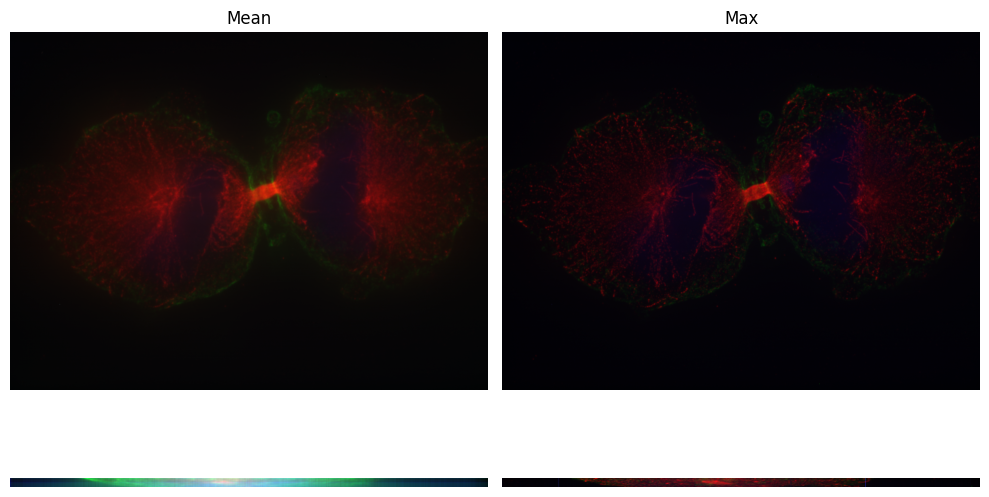

In [23]:
fig, axs = plt.subplots(2,2,figsize=(10,7))
axs[0,0].imshow(image_utils.normalize_image(mean_proj_xy))
axs[0,1].imshow(image_utils.normalize_image(max_proj_xy))
axs[1,0].imshow(image_utils.normalize_image(mean_proj_xz).transpose(1,0,2))
axs[1,1].imshow(image_utils.normalize_image(max_proj_xz).transpose(1,0,2))
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[0,0].set_title('Mean')
axs[0,1].set_title('Max')
fig.tight_layout()

In [24]:
x = ml["X"]

chs = measure.profile_line(max_proj_xz.T, 
                              [x, max_proj_xz.shape[1]-1], 
                              [x, 0], 
                              linewidth=25)
mt, _, _ = chs.T
_, res_lsq_mt = line_utils.fit_gaussian_fwhm(mt, return_dict=True)
z_coord = res_lsq_mt.x[1]
print(z_coord)


14.433388057070632


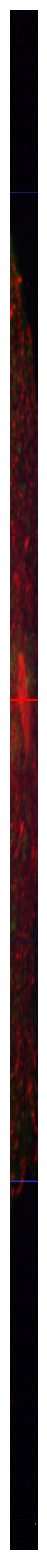

In [25]:
fig, ax = plt.subplots(1,1, figsize=(20,20))
line_utils.imshow_with_profile(ax, max_proj_xz, x, x, 0, max_proj_xz.shape[1]-1)
